# Digit recognition in Machine Learning


## Desription

The MNSIT dataset is composed of a set of 42 000 images for trainging with a resolution of 28x28x1 in grayscale.

## Initialisation

### Load data


In [1]:
import pandas as pd

df_train = pd.read_csv("Datasets/train.csv")
y = df_train["label"]
X = df_train.drop("label", axis=1)

In [2]:
# df_test = pd.read_csv("Datasets/test.csv")
# y_test = []  # Empty no labels for test data
# X_test = df_test

### Show images info

In [3]:
print(df_train.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
# df_test.head()

In [ ]:
# df_test.info()

### Plot images

Plot images as BW with reversed BW.

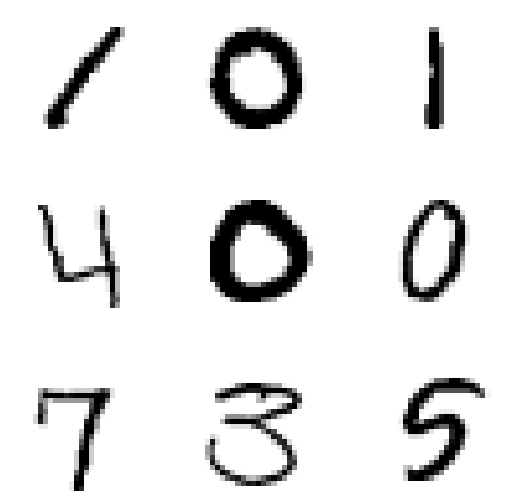

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X.iloc[i, 0:].values.reshape(28, 28), cmap=plt.cm.gray_r)
    plt.axis("off")
plt.show()

## Preprocess

### Split data

Not needed because GridSearch will do it as well as a cross validation verification.

In [6]:
from sklearn.model_selection import train_test_split

# No use now, handled by gridsearch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

### Images processing

In [7]:
from sklearn.preprocessing import MinMaxScaler

### Feature scaling
## Rescale to -1,+1 in our case 0,+1 because we only have positive pixels' value:
scale = MinMaxScaler()

# fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
X_train = scale.fit_transform(X_train)

# Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data.
X_test = scale.transform(X_test)

## Hyper-parameters tuning

### Cross validation

Not needed because GridSearch will do it as well as a split data verification.

In [8]:
from sklearn.model_selection import cross_val_score

# scores = cross_val_score(model, X, y, cv=5)
# print(scores)

### Hyper-parameters tuning and cross validation with data split

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_params = {'n_neighbors': [i for i in range(1, 11)], 'weights': ["uniform", "distance"]}

gsCV = GridSearchCV(knn, grid_params, verbose=3, cv=5)  # Do cross validation too

In [10]:
print(gsCV.fit(X, y))

### Choose best model

In [11]:
print(gsCV.best_params_)

In [12]:
print(gsCV.best_score_)

In [13]:
# knn = gsCV.best_estimator_
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
print(knn.fit(X_train, y_train))

KNeighborsClassifier(n_neighbors=4, weights='distance')


### Predict on test set

In [14]:
# Predict
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

### Results

In [ ]:
# 0.976
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import seaborn as sns

# Accuracies
def print_scores(y_train, y_test, y_pred_train, y_pred_test):
    print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}.")
    print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}.")



# Confusion matrix
def print_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.show()



# ROC curve
def print_roc_curve(model, X_test, y_test, name, title):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=9)
    plt.plot(fpr, tpr, label=name)
    plt.xlabel("False positive")
    plt.ylabel("True positive")
    plt.title(title)
    plt.show()

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(knn, X_test, y_test, "KNeighborsClassifier", "knn roc curve")

## Test of other models

### SVC

Train accuracy: 0.9999404761904762.
Test accuracy: 0.9796428571428571.


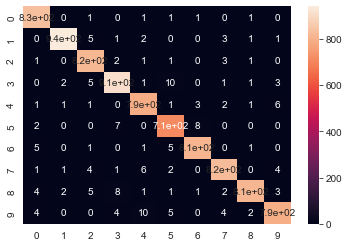

AttributeError: predict_proba is not available when  probability=False

In [18]:
## 0.976
from sklearn import svm
#
# svc = svm.SVC(C=10, probability=True)
#
# svc.fit(X_train, y_train)
#
# y_pred_train = svc.predict(X_train)
# y_pred_test = svc.predict(X_test)
#
# print_scores(y_train, y_test, y_pred_train, y_pred_test)
# print_confusion_matrix(y_test, y_pred_test)
# print_roc_curve(svc, X_test, y_test, "svm", "svc")

### Random Forest

Train accuracy: 1.0.
Test accuracy: 0.9648809523809524.


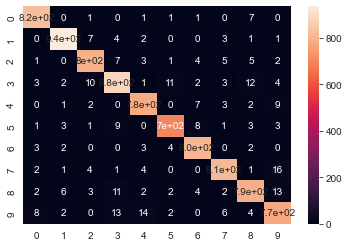

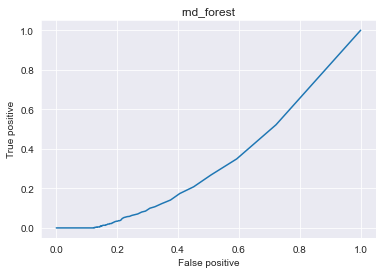

In [21]:
## 0.96
from sklearn.ensemble import RandomForestClassifier

rnd_forest = RandomForestClassifier(n_estimators=800)

rnd_forest.fit(X_train,y_train)

# param_grid_rf = {'n_estimators': [10, 100, 200, 400, 800, 1000]}
# gsCV = GridSearchCV(rnd_forest, param_grid_rf, verbose=3, cv=5)

# print(gsCV.fit(X_train, y_train))

# rnd_forest = gsCV.best_estimator_

y_pred_train = rnd_forest.predict(X_train)
y_pred_test = rnd_forest.predict(X_test)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(rnd_forest, X_test, y_test, "RandomForestClassifier", "rnd_forest")

### DecisionTreeClassifier

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .....criterion=gini, splitter=best;, score=0.846 total time=   6.5s
[CV 2/5] END .....criterion=gini, splitter=best;, score=0.847 total time=   6.5s
[CV 3/5] END .....criterion=gini, splitter=best;, score=0.840 total time=   6.0s
[CV 4/5] END .....criterion=gini, splitter=best;, score=0.848 total time=   6.2s
[CV 5/5] END .....criterion=gini, splitter=best;, score=0.843 total time=   6.1s
[CV 1/5] END ...criterion=gini, splitter=random;, score=0.847 total time=   3.0s
[CV 2/5] END ...criterion=gini, splitter=random;, score=0.849 total time=   2.9s
[CV 3/5] END ...criterion=gini, splitter=random;, score=0.851 total time=   3.0s
[CV 4/5] END ...criterion=gini, splitter=random;, score=0.844 total time=   3.1s
[CV 5/5] END ...criterion=gini, splitter=random;, score=0.842 total time=   3.0s
[CV 1/5] END ..criterion=entropy, splitter=best;, score=0.858 total time=   6.2s
[CV 2/5] END ..criterion=entropy, splitter=best;,

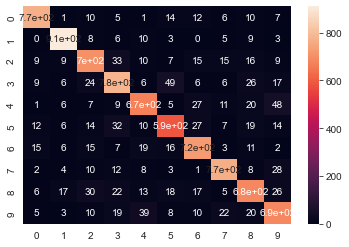

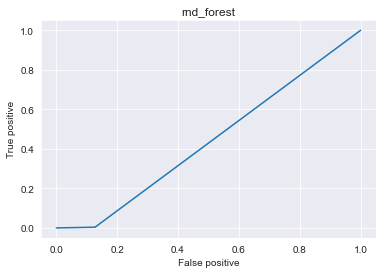

In [29]:
## 0.88
from sklearn.tree import DecisionTreeClassifier
#
# dtclf = DecisionTreeClassifier()
#
# param_grid_rf = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random']}
#
# gsCV = GridSearchCV(dtclf, param_grid_rf, verbose=3, cv=5)
#
# gsCV.fit(X_train,y_train)
#
# dtclf = gsCV.best_estimator_
#
# y_pred_train = dtclf.predict(X_train)
# y_pred_test = dtclf.predict(X_test)
#
# print_scores(y_train, y_test, y_pred_train, y_pred_test)
# print_confusion_matrix(y_test, y_pred_test)
# print_roc_curve(dtclf, X_test, y_test, "RandomForestClassifier", "rnd_forest")

In [32]:
print(gsCV.best_estimator_)
print(gsCV.best_params_)

DecisionTreeClassifier(criterion='entropy')
{'criterion': 'entropy', 'splitter': 'best'}


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

param_grid_rf = {'loss':['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}

gsCV = GridSearchCV(sgd, param_grid_rf, verbose=3, cv=5)

gsCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ........................loss=hinge;, score=0.910 total time=  10.0s
[CV 2/5] END ........................loss=hinge;, score=0.907 total time=  10.0s
[CV 3/5] END ........................loss=hinge;, score=0.904 total time=  10.1s
[CV 4/5] END ........................loss=hinge;, score=0.908 total time=  10.8s
[CV 5/5] END ........................loss=hinge;, score=0.904 total time=  10.2s
[CV 1/5] END .......................loss=log_loss;, score=nan total time=   0.0s
[CV 2/5] END .......................loss=log_loss;, score=nan total time=   0.0s
[CV 3/5] END .......................loss=log_loss;, score=nan total time=   0.0s
[CV 4/5] END .......................loss=log_loss;, score=nan total time=   0.0s
[CV 5/5] END .......................loss=log_loss;, score=nan total time=   0.0s
[CV 1/5] END ..........................loss=log;, score=0.911 total time=  10.8s
[CV 2/5] END ..........................loss=log;

## Ensemble Learning

### Stacked models

C:\Users\Quentin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy: 1.0.
Test accuracy: 0.9791666666666666.


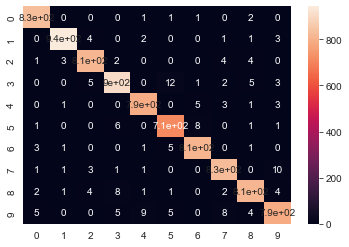

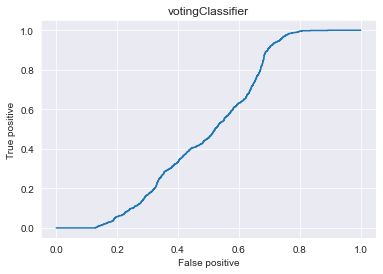

In [33]:
from sklearn.ensemble import StackingClassifier

knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
svc = svm.SVC(C=10)
rnd_forest = RandomForestClassifier(n_estimators=800)
dtclf = DecisionTreeClassifier(criterion='entropy', splitter='best')

# ADD A  ---------SGD---------

sclf = StackingClassifier(estimators=[('knn', knn), ('svc', svc), ('rnd_forest', rnd_forest),('dtclf', dtclf)])

sclf.fit(X_train, y_train)

y_pred_test = sclf.predict(X_test)\
y_pred_train = sclf.predict(X_train)

print_scores(y_train, y_test, y_pred_train, y_pred_test)
print_confusion_matrix(y_test, y_pred_test)
print_roc_curve(sclf, X_test, y_test, "VotingClassifier", "votingClassifier")